In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("NY property data.csv")
df.head()

,RECORD,BBLE,B,BLOCK,LOT,EASEMENT,OWNER,BLDGCL,TAXCLASS,LTFRONT,...,BLDFRONT,BLDDEPTH,AVLAND2,AVTOT2,EXLAND2,EXTOT2,EXCD2,PERIOD,YEAR,VALTYPE
0,1,1000010101,1,1,101,NaN,U S GOVT LAND & BLDGS,P7,4,500,...,0,0,3775500.0,8613000.0,3775500.0,8613000.0,NaN,FINAL,2010/11,AC-TR
1,2,1000010201,1,1,201,NaN,U S GOVT LAND & BLDGS,Z9,4,27,...,0,0,11111400.0,80690400.0,11111400.0,80690400.0,NaN,FINAL,2010/11,AC-TR
2,3,1000020001,1,2,1,NaN,DEPT OF GENERAL SERVI,Y7,4,709,...,709,564,32321790.0,40179510.0,32321790.0,40179510.0,NaN,FINAL,2010/11,AC-TR
3,4,1000020023,1,2,23,NaN,DEPARTMENT OF BUSINES,T2,4,793,...,85,551,13644000.0,15750000.0,13644000.0,15750000.0,NaN,FINAL,2010/11,AC-TR
4,5,1000030001,1,3,1,NaN,PARKS AND RECREATION,Q1,4,323,...,89,57,106348680.0,107758350.0,106348680.0,107758350.0,NaN,FINAL,2010/11,AC-TR


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070994 entries, 0 to 1070993
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   RECORD    1070994 non-null  int64  
 1   BBLE      1070994 non-null  object 
 2   B         1070994 non-null  int64  
 3   BLOCK     1070994 non-null  int64  
 4   LOT       1070994 non-null  int64  
 5   EASEMENT  4636 non-null     object 
 6   OWNER     1039249 non-null  object 
 7   BLDGCL    1070994 non-null  object 
 8   TAXCLASS  1070994 non-null  object 
 9   LTFRONT   1070994 non-null  int64  
 10  LTDEPTH   1070994 non-null  int64  
 11  EXT       354305 non-null   object 
 12  STORIES   1014730 non-null  float64
 13  FULLVAL   1070994 non-null  float64
 14  AVLAND    1070994 non-null  float64
 15  AVTOT     1070994 non-null  float64
 16  EXLAND    1070994 non-null  float64
 17  EXTOT     1070994 non-null  float64
 18  EXCD1     638488 non-null   float64
 19  STADDR    1070318 non

### Categorical field

In [247]:
ccol = 'VALTYPE'
# n of unique
df.groupby(ccol).count()['RECORD'].sort_values(ascending=False)

VALTYPE
AC-TR    1070994
Name: RECORD, dtype: int64

In [248]:
#unique
print('unique: ', df[ccol].nunique())

unique:  1


In [143]:
#df[ccol].sort_values(ascending=False)

In [239]:
# extract head
head = 30

blc30 = df.groupby(ccol).count()['RECORD'].sort_values(ascending=False).head(head).reset_index()[ccol]
df_head = df[df[ccol].isin(blc30)]


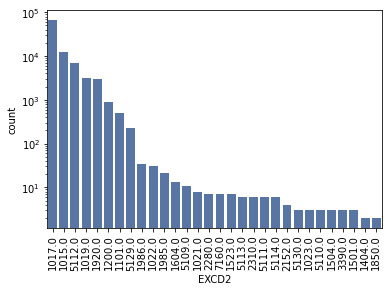

In [242]:
g = sns.set_color_codes("deep")
g = sns.countplot(x=ccol, data=df_head, color='b',order=df_head[ccol].value_counts().index)
plt.xticks(rotation=90)
g.set_yscale('log')
#plt.show()
plt.savefig(ccol+'.png', bbox_inches='tight')

In [39]:
cat = ['RECORD', 'BBLE', 'B', 'BLOCK', 'LOT', 'EASEMENT', 'OWNER', 'BLDGCL', 'TAXCLASS', 'EXT', 
       'ZIP', 'EXCD1', 'STADDR', 'EXMPTCL', 'EXCD2', 'PERIOD', 'YEAR', 'VALTYPE']
df[cat] = pd.Categorical(df[cat])

### Numeric fields

In [188]:
ncol = 'EXTOT2'
print('unique: ', df[ncol].nunique())
print('mean: ', round(df[ncol].mean(),2))
print('std: ', round(df[ncol].std(), 2))
print('min: ', df[ncol].min())
print('max: ', df[ncol].max())
print('zero: ', np.sum(df[ncol] == 0))

unique:  48348
mean:  656768.28
std:  16072510.17
min:  7.0
max:  4501180002.0
zero:  0


In [235]:
#without outlier
wo_df = df[df[ncol] <=60000000]
print('% populated: ', round((len(wo_df)/sum(df[ncol].notnull()))*100, 2))

% populated:  99.9


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


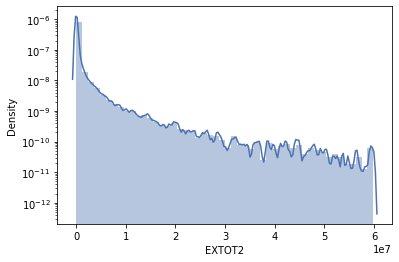

In [236]:
g = sns.set_color_codes("deep")
g = sns.distplot(wo_df[ncol], color='b')
#plt.xticks(rotation=90)
g.set_yscale('log')
#plt.show()
plt.savefig(ncol+'.png', bbox_inches='tight')

In [168]:
df[df[ncol] >800][ncol]


8399       6414
14507       982
14971      5614
15605      1394
33488       810
33549      1227
56080      1362
95089       870
110017     3100
111419     7575
111425     7538
120211      961
151969      845
152049      841
162904     1943
176315     1844
176386     1844
188020      900
206742     1000
235411     1000
235452      805
269397     1169
282643     6020
294888     5518
319776      825
333411     4017
334491     2025
334665     3285
376945      834
443259     4149
450534     1160
576770      839
590739     1225
605848      911
648260     2030
658932     2500
682937     1102
698306     1280
698544      815
756526     1925
930567      840
956519     1812
973848      875
1015418     880
1061703    1818
Name: BLDFRONT, dtype: int64